# Customer Purchase Behavior Analysis using EDA and Data Visualization
### Dataset: Ecommerce Data – Kaggle
### Goal: Understand customer purchase behavior using EDA and visualizations.

## Import Libraries and Load Dataset
#### Essential libraries help in data manipulation and visualization.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Understand the Dataset

In [79]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [80]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [81]:
df.shape

(541909, 8)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [83]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Clean the Data: 
#### To remove incorrect or missing values for accurate analysis.

In [84]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [85]:
# Handle missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [86]:
df.dropna(inplace=True)  # or use fillna() if appropriate

In [87]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [88]:
# Remove canceled orders (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove rows with non-positive quantity or price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

## Feature Engineering:
#### To add meaningful columns that simplify analysis.

In [89]:
# Add TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract additional features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

## Univariate Analysis
#### To understand distribution and frequency of individual features.

Text(0, 0.5, 'Count')

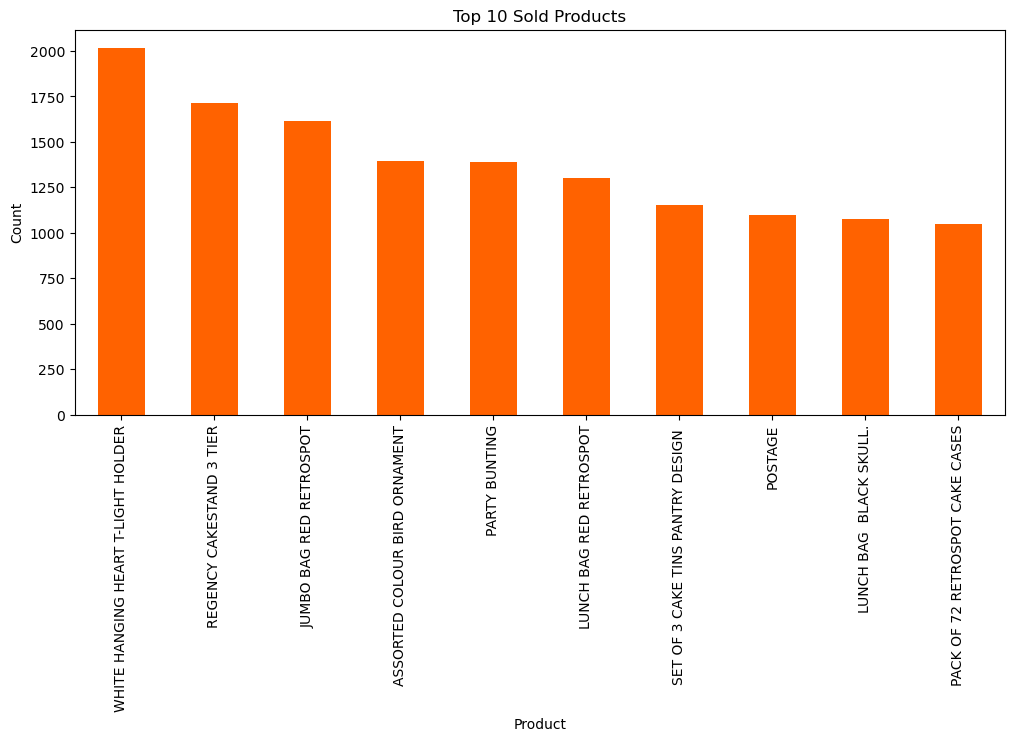

In [90]:
# Top 10 most sold products
top_products = df['Description'].value_counts().head(10)

plt.figure(figsize=(12, 5))
top_products.plot(kind='bar', color='#ff6200', title='Top 10 Sold Products')

plt.xlabel('Product')
plt.ylabel('Count')

#### Distribution of Purchase Amounts

Text(0.5, 1.0, 'Distribution of Purchase Amounts')

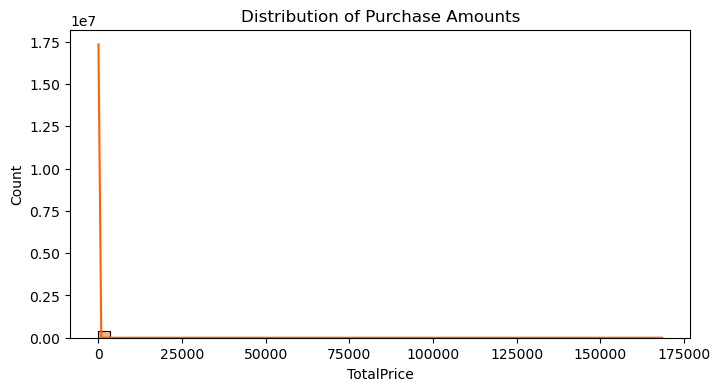

In [91]:
# Revenue distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['TotalPrice'],color='#ff6200', bins=50, kde=True)
plt.title("Distribution of Purchase Amounts")

## Bivariate Analysis
#### To analyze relationships between two variables.

### Revenue by Country (Top 10)

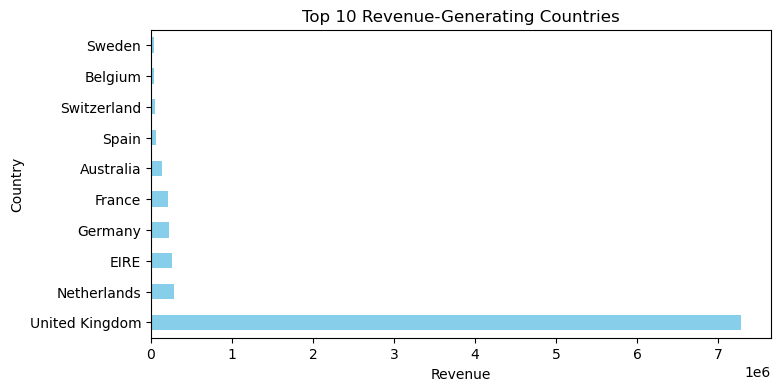

In [92]:
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)[:10]
country_revenue.plot(kind='barh', figsize=(8, 4), title='Top 10 Revenue-Generating Countries', color='skyblue')
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()

### 2. Sales by Hour of Day

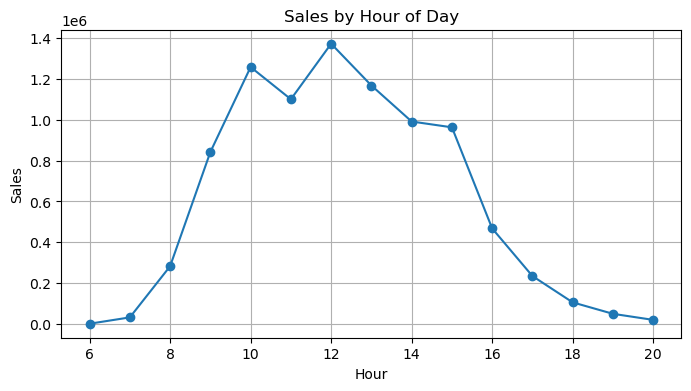

In [93]:
hourly_sales = df.groupby('Hour')['TotalPrice'].sum()
hourly_sales.plot(kind='line', marker='o', figsize=(8, 4), title='Sales by Hour of Day')
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

## Customer Analysis
### Top 10 Customers by Revenue

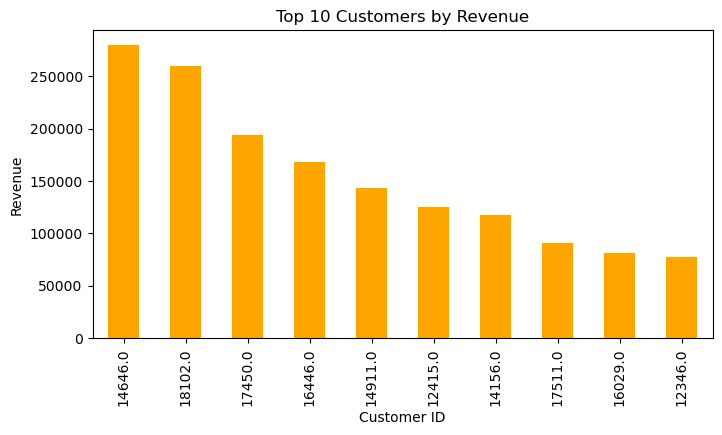

In [94]:
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', figsize=(8, 4), title='Top 10 Customers by Revenue', color='orange')
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.show()

## Correlation Heatmap
#### To check the relationship between numerical features.

Text(0.5, 1.0, 'Correlation Heatmap')

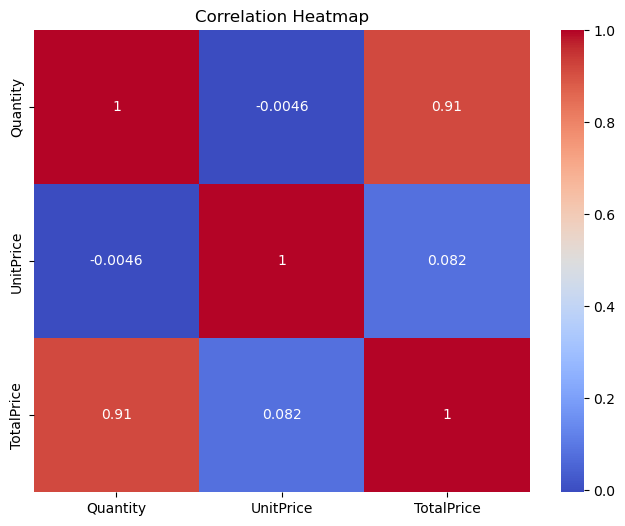

In [95]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalPrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


## Summary of Insights

- Majority of purchases are made during business hours (10 AM to 4 PM)
- United Kingdom contributes the most to revenue
- A few customers and products drive the majority of sales
- Strong correlation between quantity and total price

---

## Conclusion:
This EDA revealed valuable trends in customer behavior and purchasing patterns that can support data-driven decisions in marketing and inventory.

---
